In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u

from exod.post_processing.crossmatch import CrossMatch
from exod.post_processing.crossmatch import crossmatch_vizier

In [6]:
df_regions = pd.read_csv('../data/results_combined/30_4_2024/df_regions.csv')
#df_regions = df_regions.sample(100)

In [7]:
df_regions

,label,bbox-0,bbox-1,bbox-2,bbox-3,centroid-0,centroid-1,weighted_centroid-0,weighted_centroid-1,intensity_mean,...,area_bbox,x_img,y_img,X,Y,ra,dec,ra_deg,dec_deg,runid
0,0,32,22,33,23,32.0,22.0,32.0,22.0,12.0,...,1.0,200.930233,130.604651,16074.418605,10448.372093,0h39m12.29s,-43d49m30.54s,9.801227,-43.825151,0911990501_0_5_0.2_2.0
1,1,40,31,41,32,40.0,31.0,40.0,31.0,135.0,...,1.0,241.116279,175.813953,19289.302326,14065.116279,0h38m57.42s,-43d46m30.02s,9.739232,-43.775004,0911990501_0_5_0.2_2.0
2,2,45,77,46,78,45.0,77.0,45.0,77.0,211.0,...,1.0,266.232558,406.883721,21298.604651,32550.697674,0h38m48.05s,-43d31m05.87s,9.700222,-43.518297,0911990501_0_5_0.2_2.0
3,3,74,71,75,72,74.0,71.0,74.0,71.0,156.0,...,1.0,411.906977,376.744186,32952.558140,30139.534884,0h37m54.46s,-43d33m06.26s,9.476927,-43.551739,0911990501_0_5_0.2_2.0
4,4,78,57,79,58,78.0,57.0,78.0,57.0,135.0,...,1.0,432.000000,306.418605,34560.000000,24513.488372,0h37m47.02s,-43d37m47.42s,9.445900,-43.629838,0911990501_0_5_0.2_2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56609,1,46,40,47,41,46.0,40.0,46.0,40.0,173.0,...,1.0,326.511628,286.325581,26120.930233,22906.046512,17h34m36.16s,-32d35m40.32s,263.650656,-32.594534,0001730201_0_50_0.2_12.0
56610,0,42,42,43,43,42.0,42.0,42.0,42.0,18312.0,...,1.0,306.418605,296.372093,24513.488372,23709.767442,17h34m42.52s,-32d35m00.13s,263.677153,-32.583369,0001730201_0_200_0.2_2.0
56611,0,42,42,43,43,42.0,42.0,42.0,42.0,19083.0,...,1.0,306.418605,296.372093,24513.488372,23709.767442,17h34m42.52s,-32d35m00.13s,263.677153,-32.583369,0001730201_0_200_0.2_12.0
56612,0,30,54,31,55,30.0,54.0,30.0,54.0,149.0,...,1.0,241.116279,361.674419,19289.302326,28933.953488,4h20m13.59s,56d04m04.08s,65.056633,56.067800,0000110101_0_5_0.2_2.0


In [95]:
def split_subsets(df_regions):
    subsets = ['5_0.2_2.0',
               '5_2.0_12.0',
               '5_0.2_12.0',
               '50_0.2_2.0',
               '50_2.0_12.0',
               '50_0.2_12.0',
               '200_0.2_2.0',
               '200_2.0_12.0',
               '200_0.2_12.0']
    
    dfs = {}
    for s in subsets:
        dfs[s] = df_regions[df_regions['runid'].str.contains(s)]
    return dfs


def calc_subset_stats(dfs):
    all_res = []
    for k, df in dfs.items():
        t_bin, E_lo, E_hi = k.split('_')
        res = {'subset'      : k,
               't_bin'       : t_bin,
               'E_lo'        : E_lo,
               'E_hi'        : E_hi,
               'n_regions'   : len(df),
               'n_obsids'    : len(df['runid'].value_counts()),
               'reg/obs'     : len(df) / len(df['runid'].value_counts()),
               'mean counts' : df['intensity_mean'].mean(),
               'std counts' : df['intensity_mean'].std(),
               }
        all_res.append(res)
    
    df_region_subset = pd.DataFrame(all_res)
    return df_region_subset
    

In [96]:
dfs = split_subsets(df_regions=df_regions)
df_region_subset = calc_subset_stats(dfs)

In [98]:
df_region_subset.style.background_gradient(sns.diverging_palette(125, 365, as_cmap=True))

,subset,t_bin,E_lo,E_hi,n_regions,n_obsids,reg/obs,mean counts,std counts
0,5_0.2_2.0,5,0.2,2.0,10070,5041,1.997620,2781.878010,24778.388396
1,5_2.0_12.0,5,2.0,12.0,914,834,1.095923,7671.845726,28376.999220
2,5_0.2_12.0,5,0.2,12.0,11330,5483,2.066387,3893.257390,29400.625550
3,50_0.2_2.0,50,0.2,2.0,5508,3444,1.599303,8612.957318,28495.135963
4,50_2.0_12.0,50,2.0,12.0,1226,970,1.263918,10296.846192,23847.637597
5,50_0.2_12.0,50,0.2,12.0,6787,3942,1.721715,9407.034449,31093.744414
6,200_0.2_2.0,200,0.2,2.0,5885,3437,1.712249,8627.852442,25104.640207
7,200_2.0_12.0,200,2.0,12.0,3241,1864,1.738734,4897.543893,14462.856199
8,200_0.2_12.0,200,0.2,12.0,11653,4500,2.589556,6118.062923,20964.633636


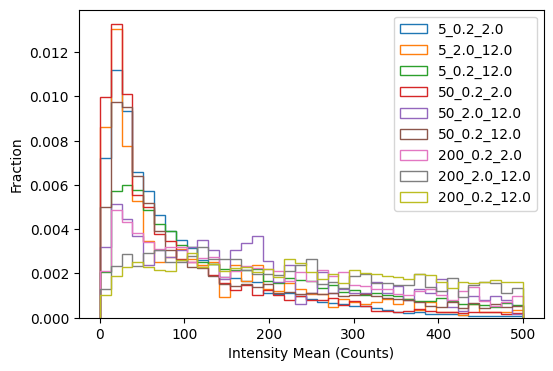

In [116]:
plt.figure(figsize=(6,4))
for k, df in dfs.items():
    plt.hist(df['intensity_mean'], bins=np.linspace(0,500, 40), label=k, histtype='step', lw=1.0, density=True)
plt.xlabel('Intensity Mean (Counts)')
plt.ylabel('Fraction')
plt.legend()
plt.show()
    

In [ ]:
def crossmatch_subsets(dfs):
    return something bruh

In [119]:
from astropy.coordinates import SkyCoord

In [124]:
SkyCoord(ra=df['ra_deg'], dec=df['dec_deg'], unit='deg', frame='fk5', equinox='J2000')

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    [(  9.80081492, -43.69119907), (  9.76190721, -43.56288437),
     (  9.64636411, -43.56297669), ..., ( 58.48710336,  23.34763886),
     ( 99.34803735,   6.13436107), (263.67715345, -32.58336923)]>

In [117]:
df

,label,bbox-0,bbox-1,bbox-2,bbox-3,centroid-0,centroid-1,weighted_centroid-0,weighted_centroid-1,intensity_mean,...,area_bbox,x_img,y_img,X,Y,ra,dec,ra_deg,dec_deg,runid
23,0,32,46,33,47,32.0,46.0,32.0,46.0,560.0,...,1.0,200.930233,251.162791,16074.418605,20093.023256,0h39m12.20s,-43d41m28.32s,9.800815,-43.691199,0911990501_0_200_0.2_12.0
24,1,37,69,38,70,37.0,69.0,37.0,69.0,473.0,...,1.0,226.046512,366.697674,18083.720930,29335.813953,0h39m02.86s,-43d33m46.38s,9.761907,-43.562884,0911990501_0_200_0.2_12.0
25,2,52,69,53,70,52.0,69.0,52.0,69.0,787.0,...,1.0,301.395349,366.697674,24111.627907,29335.813953,0h38m35.13s,-43d33m46.72s,9.646364,-43.562977,0911990501_0_200_0.2_12.0
26,3,59,60,60,61,59.0,60.0,59.0,60.0,613.0,...,1.0,336.558140,321.488372,26924.651163,25719.069767,0h38m22.18s,-43d36m47.56s,9.592424,-43.613212,0911990501_0_200_0.2_12.0
27,4,86,60,87,61,86.0,60.0,86.0,60.0,635.0,...,1.0,472.186047,321.488372,37774.883721,25719.069767,0h37m32.23s,-43d36m46.75s,9.384273,-43.612987,0911990501_0_200_0.2_12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56592,0,33,46,34,47,33.0,46.0,33.0,46.0,2881.0,...,1.0,246.139535,316.465116,19691.162791,25317.209302,11h09m56.61s,-77d37m07.81s,167.485890,-77.618835,0002740501_0_200_0.2_12.0
56598,0,30,38,31,39,30.0,38.0,30.0,38.0,1738.0,...,1.0,241.116279,261.209302,19289.302326,20896.744186,3h54m12.95s,23d20m51.40s,58.553973,23.347611,0002740101_0_200_0.2_12.0
56599,1,41,38,42,39,41.0,38.0,41.0,38.0,2182.0,...,1.0,296.372093,261.209302,23709.767442,20896.744186,3h53m56.90s,23d20m51.50s,58.487103,23.347639,0002740101_0_200_0.2_12.0
56606,0,45,43,46,44,45.0,43.0,45.0,43.0,16452.0,...,1.0,336.558140,341.581395,26924.651163,27326.511628,6h37m23.53s,6d08m03.70s,99.348037,6.134361,0001730601_0_200_0.2_12.0


In [137]:
from itertools import combinations
from astropy.table import Table

In [150]:
for (k1, df1), (k2, df2) in combinations(dfs.items(), r=2):
    print(f'{k1} ({len(df1)}) {k2} ({len(df2)})')

    sc1 = SkyCoord(ra=df1['ra_deg'], dec=df1['dec_deg'], unit='deg', frame='fk5', equinox='J2000')
    sc2 = SkyCoord(ra=df2['ra_deg'], dec=df2['dec_deg'], unit='deg', frame='fk5', equinox='J2000')

    cmatch = sc1.match_to_catalog_sky(sc2)

    tab_cmatch = Table(cmatch)
    tab_cmatch.rename_columns(names=tab_cmatch.colnames, new_names=['idx', 'sep2d', 'dist3d'])
    tab_cmatch['sep2d'] = tab_cmatch['sep2d'].to(u.arcsec)
    

    tab_cmatch_good = tab_cmatch[tab_cmatch['sep2d'] < 1*u.arcsec]
    print(f'{len(tab_cmatch_good)} Associated Sources')
    print('='*50)
    #print(tab_cmatch)


5_0.2_2.0 (10070) 5_2.0_12.0 (914)
42 Associated Sources
5_0.2_2.0 (10070) 5_0.2_12.0 (11330)
7290 Associated Sources
5_0.2_2.0 (10070) 50_0.2_2.0 (5508)
1676 Associated Sources
5_0.2_2.0 (10070) 50_2.0_12.0 (1226)
118 Associated Sources
5_0.2_2.0 (10070) 50_0.2_12.0 (6787)
1120 Associated Sources
5_0.2_2.0 (10070) 200_0.2_2.0 (5885)
650 Associated Sources
5_0.2_2.0 (10070) 200_2.0_12.0 (3241)
107 Associated Sources
5_0.2_2.0 (10070) 200_0.2_12.0 (11653)
495 Associated Sources
5_2.0_12.0 (914) 5_0.2_12.0 (11330)
508 Associated Sources
5_2.0_12.0 (914) 50_0.2_2.0 (5508)
50 Associated Sources
5_2.0_12.0 (914) 50_2.0_12.0 (1226)
130 Associated Sources
5_2.0_12.0 (914) 50_0.2_12.0 (6787)
129 Associated Sources
5_2.0_12.0 (914) 200_0.2_2.0 (5885)
41 Associated Sources
5_2.0_12.0 (914) 200_2.0_12.0 (3241)
83 Associated Sources
5_2.0_12.0 (914) 200_0.2_12.0 (11653)
85 Associated Sources
5_0.2_12.0 (11330) 50_0.2_2.0 (5508)
1577 Associated Sources
5_0.2_12.0 (11330) 50_2.0_12.0 (1226)
242 Asso